## Sustainability parameter 3 - Waste Management

In [60]:
## Importing required packages
import pandas as pd 
import numpy as np 
import missingno as miss


In [61]:
##Loading data
raw_data_waste = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Data/city_level_data_waste.csv")
##Printing data
raw_data_waste.head()


,iso3c,region_id,country_name,income_id,city_name,additional_data_annual_budget_for_waste_management_year,additional_data_annual_solid_waste_budget_year,additional_data_annual_swm_budget_2017_year,additional_data_annual_swm_budget_year,additional_data_annual_waste_budget_year,...,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent
0,AFG,SAS,Afghanistan,LIC,Jalalabad,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,Kandahar,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
2,AFG,SAS,Afghanistan,LIC,Mazar-E-Sharif,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
3,AFG,SAS,Afghanistan,LIC,Kabul,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,25.0,NaN
4,AFG,SAS,Afghanistan,LIC,HiratÂ,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN


In [62]:
## Picking the necessary columns

waste = raw_data_waste[['country_name','total_msw_total_msw_generated_tons_year']]
waste.columns = ['country','msw_year']
print(waste)

         country            msw_year
0    Afghanistan            58914.45
1    Afghanistan              120971
2    Afghanistan             52368.4
3    Afghanistan             1989250
4    Afghanistan             91644.7
..           ...                 ...
362     Zimbabwe            352334.5
363     Zimbabwe  37887.599999999999
364     Zimbabwe  7423.3600000000006
365     Zimbabwe                 NaN
366     Zimbabwe                 NaN

[367 rows x 2 columns]


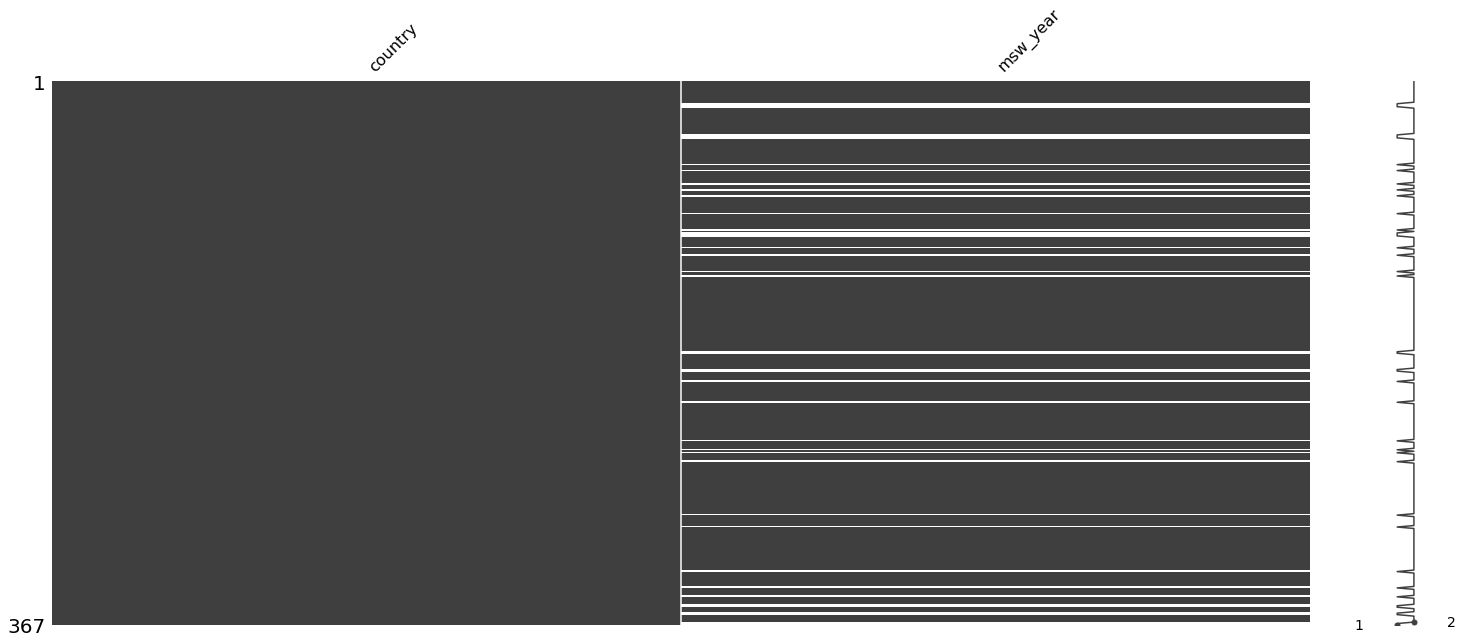

In [63]:
#Checked to see if that dataset was complete
miss.matrix(waste)

In [64]:
waste.dtypes
## We need to convert the total msw into integer

country     object
msw_year    object
dtype: object

In [65]:
waste['msw_year'] = pd.to_numeric(waste['msw_year'],errors='coerce')

<ipython-input-65-9783610f06da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waste['msw_year'] = pd.to_numeric(waste['msw_year'],errors='coerce')


In [66]:
waste.dtypes

country      object
msw_year    float64
dtype: object

In [67]:
waste.replace(to_replace = np.nan, value = 0)  

,country,msw_year
0,Afghanistan,58914.45
1,Afghanistan,120971.00
2,Afghanistan,52368.40
3,Afghanistan,1989250.00
4,Afghanistan,91644.70
...,...,...
362,Zimbabwe,352334.50
363,Zimbabwe,37887.60
364,Zimbabwe,7423.36
365,Zimbabwe,0.00


In [68]:
## taking population data by country

waste = waste.groupby('country').msw_year.sum()
waste = waste.reset_index()
print(waste) 

                country    msw_year
0           Afghanistan  2313148.55
1               Albania    58955.00
2               Algeria  1397874.00
3        American Samoa        0.00
4                Angola  1316336.00
..                  ...         ...
159             Vietnam  4909250.00
160  West Bank and Gaza        0.00
161         Yemen, Rep.   510420.89
162              Zambia   615979.40
163            Zimbabwe   437146.50

[164 rows x 2 columns]


In [69]:
waste.to_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -1/Processed data - part 1/SP3_output.csv", sep=',',index=False)